In [561]:
# import the needed libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 1. Data pre-processing

In [562]:
# load the data and drop Nan includes values

data = pd.read_csv("coffee-prices-historical-chart-data.csv")
data.dropna(inplace=True)

In [563]:
# A short glance at the data 

data.head()

,date,value
0,1973-08-20,0.6735
1,1973-08-21,0.6710
2,1973-08-22,0.6580
3,1973-08-23,0.6675
4,1973-08-24,0.6660


In [564]:
# Add a new column name "time" for using Time-Step featuring

data['time'] = np.arange(len(data['date']))
data.head()

,date,value,time
0,1973-08-20,0.6735,0
1,1973-08-21,0.6710,1
2,1973-08-22,0.6580,2
3,1973-08-23,0.6675,3
4,1973-08-24,0.6660,4


In [565]:
# Add a new column name lag_1 for using Lag Featuring

data["lag_1"] = data["value"].shift(1)
data.head()

,date,value,time,lag_1
0,1973-08-20,0.6735,0,NaN
1,1973-08-21,0.6710,1,0.6735
2,1973-08-22,0.6580,2,0.6710
3,1973-08-23,0.6675,3,0.6580
4,1973-08-24,0.6660,4,0.6675


In [566]:
# set Independent Variable (feature) and Dependent Variable for both Featuring approaches


X_time_f = data.loc[:, 'time'].values
y_time_f = data.loc[:, "value"].values
y_lag_f = data.loc[:, "value"]
X_lag_f = data.loc[:, "lag_1"]
X_lag_f.dropna(inplace=True)
y_lag_f, X_lag_f = y_lag_f.align(X_lag_f, join="inner")

In [567]:
# data reshape
X_time_f = np.reshape(X_time_f, (-1, 1))
y_time_f = np.reshape(y_time_f, (-1, 1))
X_lag_f = X_lag_f.values
y_lag_f = y_lag_f.values
X_lag_f = np.reshape(X_lag_f, (-1, 1))
y_lag_f = np.reshape(y_lag_f, (-1, 1))

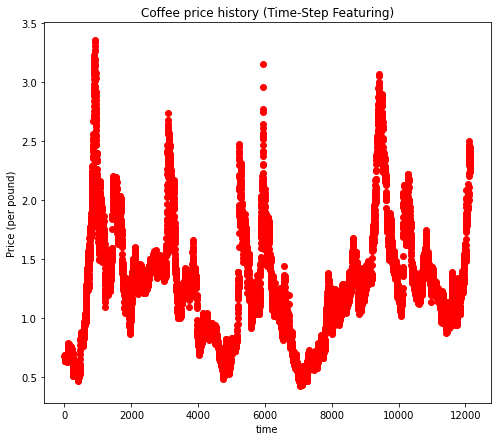

In [568]:
# A glance at the data for Time-Step Featuring

plt.figure(figsize=(8,7))
plt.scatter(X_time_f, y_time_f, color='red')
plt.title('Coffee price history (Time-Step Featuring)')
plt.xlabel('time')
plt.ylabel('Price (per pound)')
plt.show()

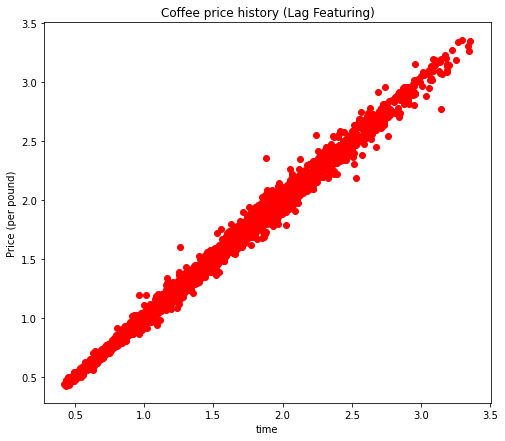

In [569]:
# A glance at the data for Lag Featuring

plt.figure(figsize=(8,7))
plt.scatter(X_lag_f, y_lag_f, color='red')
plt.title('Coffee price history (Lag Featuring)')
plt.xlabel('time')
plt.ylabel('Price (per pound)')
plt.show()

In [570]:
# split the data to train and test
# Since the feature is time series, We cannot use random split
# So we cut the last 1/3 part of the data as the recent values for test
# Test size == 1/15

test_start_index = int(len(X_time_f) - (len(X_time_f) / 3))
# time-step
X_time_f_train = X_time_f[0:test_start_index]
X_time_f_test = X_time_f[test_start_index:]
y_time_f_train = y_time_f[0:test_start_index]
y_time_f_test = y_time_f[test_start_index:]
# Lag
X_lag_f_train = X_lag_f[0:test_start_index]
X_lag_f_test = X_lag_f[test_start_index:]
y_lag_f_train = y_lag_f[0:test_start_index]
y_lag_f_test = y_lag_f[test_start_index:]

# 2. Simple Linear Regression

In [571]:
def run_simple_linear_reg(X_train, X_test, y_train, y_test, plot_title, plot_x_label, plot_y_label):
    lr_reg = LinearRegression()
    # train the Linear Regrssion model
    lr_reg.fit(X_train, y_train)
    # make prediction with Linear Regrssion
    lr_reg_y_pred = lr_reg.predict(X_test)
    # Linear Regression Coeficient and intercept values
    print("Coef: {}".format(lr_reg.coef_))
    print("Intercept:  {}".format(lr_reg.intercept_))
    print()
    # A glance at the data and fit line
    plt.figure(figsize=(8,7))
    plt.scatter(X_test, y_test, color='red')
    plt.plot(X_test, lr_reg_y_pred, color="blue")
    plt.title(plot_title)
    plt.xlabel(plot_x_label)
    plt.ylabel(plot_y_label)
    plt.show()
    # R2 score 
    r2 = r2_score(y_test, lr_reg_y_pred)
    return r2

## 2.1 Simple Linear Regression (Time-Step Feature)

Coef: [[-7.32178314e-05]]
Intercept:  [1.48229333]



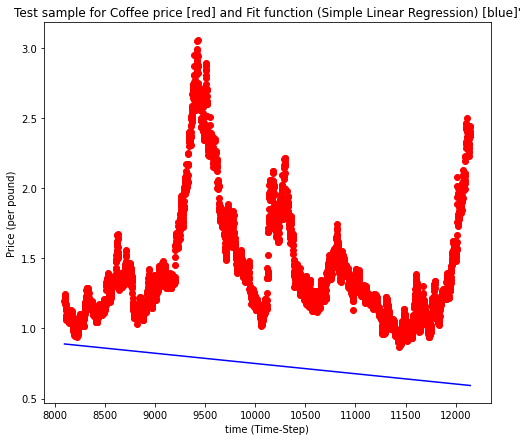

In [572]:
x_label = "time (Time-Step)"
y_label = "Price (per pound)"
title = "Test sample for Coffee price [red] and Fit function (Simple Linear Regression) [blue]'"
slr_reg_time_step_r2 =  run_simple_linear_reg(X_time_f_train, X_time_f_test, y_time_f_train, y_time_f_test, title, x_label, y_label)

In [573]:
# R2 score 

print("R2_score for Simple Linear Regression (Time-Step Featuring):  {}".format(slr_reg_time_step_r2))

R2_score for Simple Linear Regression (Time-Step Featuring):  -2.761301313867515


## 2.2 Simple Linear Regression (Lag Feature)

Coef: [[0.99781923]]
Intercept:  [0.00265039]



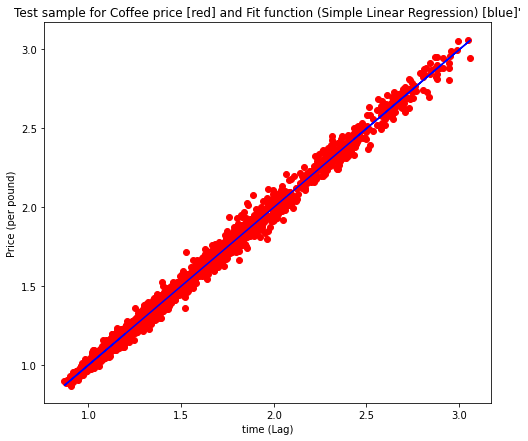

In [574]:
x_label = "time (Lag)"
y_label = "Price (per pound)"
title = "Test sample for Coffee price [red] and Fit function (Simple Linear Regression) [blue]'"
slr_reg_lag_r2 =  run_simple_linear_reg(X_lag_f_train, X_lag_f_test, y_lag_f_train, y_lag_f_test, title, x_label, y_label)

In [575]:
# R2 score 

print("R2_score for Simple Linear Regression (Lag Featuring):  {}".format(slr_reg_lag_r2))

R2_score for Simple Linear Regression (Lag Featuring):  0.9946860957484901


# 3. Polynomial Linear Regression

In [576]:
def run_polynomial_reg(X_train, X_test, y_train, y_test, degree, plot_title, plot_x_label, plot_y_label):
    # create Polynimial feature 
    poly_feature = PolynomialFeatures(degree=degree)
    X_poly_train = poly_feature.fit_transform(X_train)
    poly_feature_test = PolynomialFeatures(degree=degree)
    X_poly_test = poly_feature_test.fit_transform(X_test)
    # fit the model
    poly_model = LinearRegression()
    poly_model.fit(X_poly_train, y_train)
    # prediction
    y_pred = poly_model.predict(X_poly_test)
    # A glance at the data and fit function
    plt.figure(figsize=(8,7))
    plt.scatter(X_poly_test[:, 1], y_test, color="red")
    plt.plot(X_poly_test[:, 1], y_pred, color="blue")
    plt.title(plot_title)
    plt.xlabel(plot_x_label)
    plt.ylabel(plot_y_label)
    plt.show()
    r2 = r2_score(y_test, y_pred)
    return r2    

## 3.1 Polynomial Linear Regression (Time-Step Featuring)

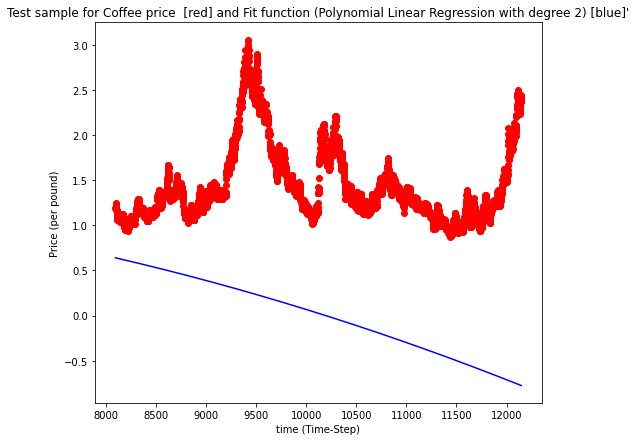

In [577]:
x_label = "time (Time-Step)"
y_label = "Price (per pound)"
title = "Test sample for Coffee price  [red] and Fit function (Polynomial Linear Regression with degree 2) [blue]'"
plr_time_step_r2 =  run_polynomial_reg(X_time_f_train, X_time_f_test, y_time_f_train, y_time_f_test, 2, title, x_label, y_label)

In [578]:
# R2 core 

print("R2_score for Polynomial Linear Regression (time-step):  {}".format(plr_time_step_r2))

R2_score for Polynomial Linear Regression (time-step):  -12.73227874368659


## 3.2 Polynomial Linear Regression (Lag Featuring)

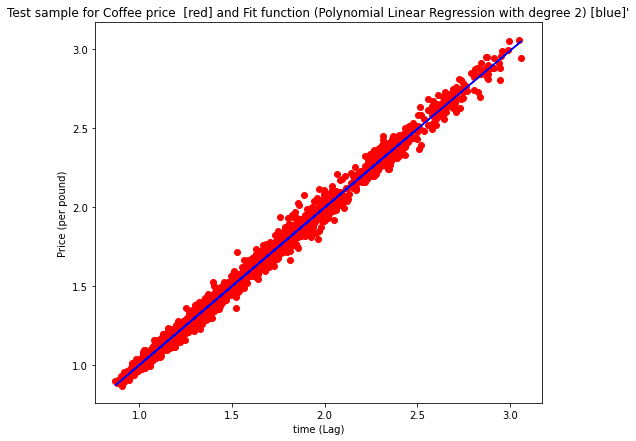

In [579]:
x_label = "time (Lag)"
y_label = "Price (per pound)"
title = "Test sample for Coffee price  [red] and Fit function (Polynomial Linear Regression with degree 2) [blue]'"
plr_lag_r2 =  run_polynomial_reg(X_lag_f_train, X_lag_f_test, y_lag_f_train, y_lag_f_test, 2, title, x_label, y_label)

In [580]:
# R2 core 

print("R2_score for Polynomial Linear Regression (Lag):  {}".format(plr_lag_r2))

R2_score for Polynomial Linear Regression (Lag):  0.9946835344684837


# 4. Support Vector Regressor 

In [581]:
def run_svr_reg(X_train, X_test, y_train, y_test, need_scale, plot_title, plot_x_label, plot_y_label):
    # Support Vectore Regrssion Model
    svr_reg = SVR(kernel='rbf')
    if need_scale:
        sc_x = StandardScaler()
        sc_x_test = StandardScaler()
        X_train = sc_x.fit_transform(X_train)
        X_test = sc_x_test.fit_transform(X_test)
    svr_reg.fit(X_train, y_train)
    # prediction 
    y_pred = svr_reg.predict(X_test)
    if need_scale:
        y_pred = y_pred.reshape(-1, 1)
    # A glance at the data and fit function
    plt.figure(figsize=(8,7))
    if need_scale:
        plt.scatter(sc_x_test.inverse_transform(X_test), y_test, color="red")
        plt.plot(sc_x_test.inverse_transform(X_test), y_pred, color="blue")
    else:
        plt.scatter(X_test, y_test, color="red")
        plt.plot(X_test, y_pred, color="blue")
    plt.title(plot_title)
    plt.xlabel(plot_x_label)
    plt.ylabel(plot_y_label)
    plt.show()
    r2 = r2_score(y_test, y_pred)
    return r2   

## 4.1 Support Vector Regressor (Time-Step Feature)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


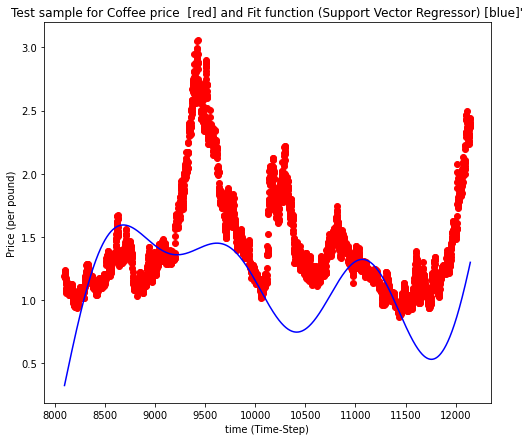

In [582]:
x_label = "time (Time-Step)"
y_label = "Price (per pound)"
title = "Test sample for Coffee price  [red] and Fit function (Support Vector Regressor) [blue]'"
svr_reg_time_step_r2 =  run_svr_reg(X_time_f_train, X_time_f_test, y_time_f_train, y_time_f_test, True, title, x_label, y_label)

In [583]:
# R2 score

print("R2_score for Support Vector Regression (Time-Step):  {}".format(svr_reg_time_step_r2))

R2_score for Support Vector Regression (Time-Step):  -0.6575477704817361


## 4.2 Support Vector Regressor (Lag Feature)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


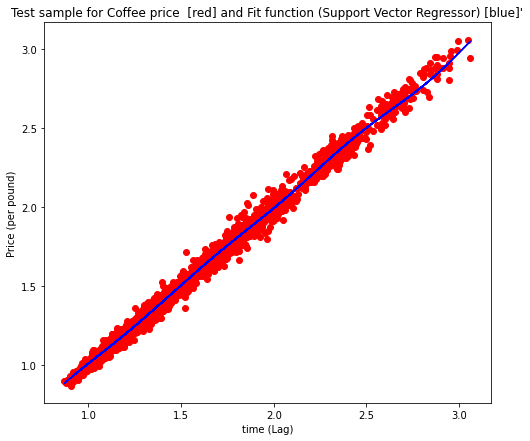

In [584]:
x_label = "time (Lag)"
y_label = "Price (per pound)"
title = "Test sample for Coffee price  [red] and Fit function (Support Vector Regressor) [blue]'"
svr_reg_lag_r2 =  run_svr_reg(X_lag_f_train, X_lag_f_test, y_lag_f_train, y_lag_f_test, False, title, x_label, y_label)

In [585]:
# R2 score

print("R2_score for Support Vector Regression (Lag):  {}".format(svr_reg_lag_r2))

R2_score for Support Vector Regression (Lag):  0.9944967674509784


# 5. Decision Tree

In [586]:
def run_dtree_reg(X_train, X_test, y_train, y_test, plot_title, plot_x_label, plot_y_label):
    # build the model
    dtree_regressor = DecisionTreeRegressor(random_state=0)
    dtree_regressor.fit(X_train, y_train)
    # prediction 
    y_pred = dtree_regressor.predict(X_test)
    # A glance at the data and fit function
    plt.figure(figsize=(8,7))
    plt.scatter(X_test, y_test, color="red")
    plt.plot(X_test, y_pred, color="blue")
    plt.title(plot_title)
    plt.xlabel(plot_x_label)
    plt.ylabel(plot_y_label)
    plt.show()
    r2 = r2_score(y_test, y_pred)
    return r2   

## 5.1 Decision Tree (Time-Step Featuring)

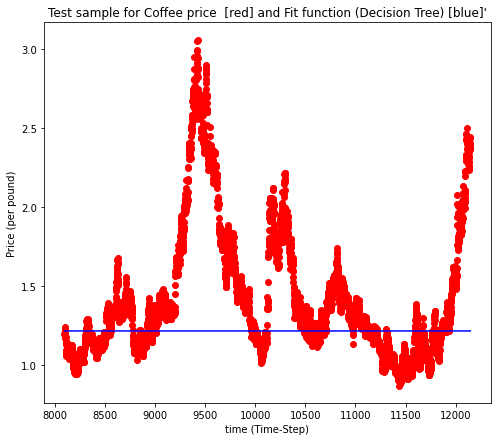

In [587]:
x_label = "time (Time-Step)"
y_label = "Price (per pound)"
title = "Test sample for Coffee price  [red] and Fit function (Decision Tree) [blue]'"
dtree_reg_time_step_r2 =  run_dtree_reg(X_time_f_train, X_time_f_test, y_time_f_train, y_time_f_test, title, x_label, y_label)

In [588]:
# R2 Score

print("R2_score for Decision Tree Regression (Time-Step):  {}".format(dtree_reg_time_step_r2))

R2_score for Decision Tree Regression (Time-Step):  -0.2652185198526895


## 5.2 Decision Tree (Lag Featuring)

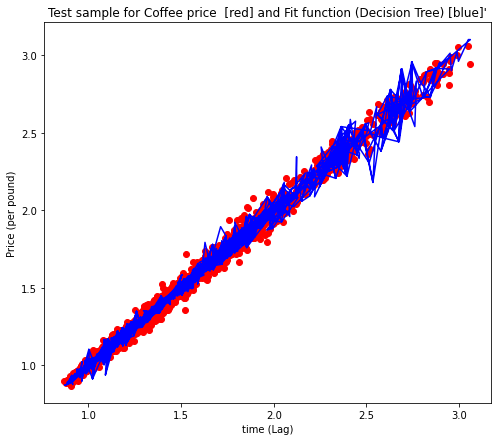

In [589]:
x_label = "time (Lag)"
y_label = "Price (per pound)"
title = "Test sample for Coffee price  [red] and Fit function (Decision Tree) [blue]'"
dtree_reg_lag_r2 =  run_dtree_reg(X_lag_f_train, X_lag_f_test, y_lag_f_train, y_lag_f_test, title, x_label, y_label)

In [590]:
# R2 Score

print("R2_score for Decision Tree Regression (Lag):  {}".format(dtree_reg_lag_r2))

R2_score for Decision Tree Regression (Lag):  0.9873284300550197


# 6. Random Forest

In [591]:
def run_rForest_reg(X_train, X_test, y_train, y_test, n_estim, plot_title, plot_x_label, plot_y_label):
    # build the model
    rf_regressor = RandomForestRegressor(n_estimators=n_estim, random_state=0)
    rf_regressor.fit(X_train, y_train)
    # prediction 
    y_pred = rf_regressor.predict(X_test)
    # A glance at the data and fit function
    plt.figure(figsize=(8,7))
    plt.scatter(X_test, y_test, color="red")
    plt.plot(X_test, y_pred, color="blue")
    plt.title(plot_title)
    plt.xlabel(plot_x_label)
    plt.ylabel(plot_y_label)
    plt.show()
    r2 = r2_score(y_test, y_pred)
    return r2  

## 6.1 Random Forest (Time-Step)

/tmp/ipykernel_29628/610336034.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


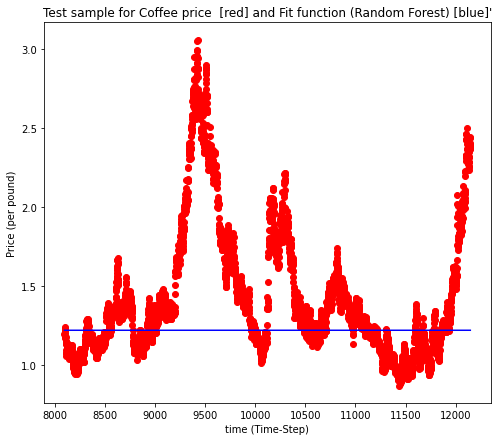

In [592]:
x_label = "time (Time-Step)"
y_label = "Price (per pound)"
title = "Test sample for Coffee price  [red] and Fit function (Random Forest) [blue]'"
rforest_reg_time_step_r2 =  run_rForest_reg(X_time_f_train, X_time_f_test, y_time_f_train, y_time_f_test, 10, title, x_label, y_label)

In [593]:
# R2 Score

print("R2_score for Random Forest Regression (Time-Step):  {}".format(rforest_reg_time_step_r2))

R2_score for Random Forest Regression (Time-Step):  -0.2544288258252443


## 6.2 Random Forest (Lag)

/tmp/ipykernel_29628/610336034.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


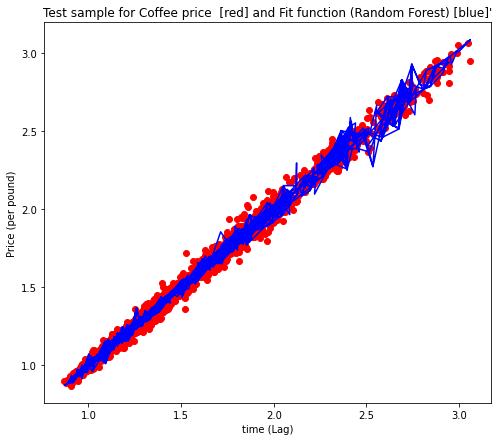

In [594]:
x_label = "time (Lag)"
y_label = "Price (per pound)"
title = "Test sample for Coffee price  [red] and Fit function (Random Forest) [blue]'"
rforest_reg_lag_r2 =  run_rForest_reg(X_lag_f_train, X_lag_f_test, y_lag_f_train, y_lag_f_test, 10, title, x_label, y_label)

In [595]:
# R2 Score

print("R2_score for Random Forest Regression (Lag):  {}".format(rforest_reg_lag_r2))

R2_score for Random Forest Regression (Lag):  0.9899267315195764


# 7. Model R2 Scores Comparison 

## 7.1 Model trained by Time-Step Feature

In [596]:
print("Simple Linear Regression:  {}".format(slr_reg_time_step_r2))
print("Polynomial Linear Regression:  {}".format(plr_time_step_r2))
print("Support Vector Regression:  {}".format(svr_reg_time_step_r2))
print("Decision Tree Regression:  {}".format(dtree_reg_time_step_r2))
print("Random Forest Regression:  {}".format(rforest_reg_time_step_r2))

Simple Linear Regression:  -2.761301313867515
Polynomial Linear Regression:  -12.73227874368659
Support Vector Regression:  -0.6575477704817361
Decision Tree Regression:  -0.2652185198526895
Random Forest Regression:  -0.2544288258252443


## 7.2 Model trained by Lag Feature

In [597]:
print("Simple Linear Regression:  {}".format(slr_reg_lag_r2))
print("Polynomial Linear Regression:  {}".format(plr_lag_r2))
print("Support Vector Regression:  {}".format(svr_reg_lag_r2))
print("Decision Tree Regression:  {}".format(dtree_reg_lag_r2))
print("Random Forest Regression:  {}".format(rforest_reg_lag_r2))

Simple Linear Regression:  0.9946860957484901
Polynomial Linear Regression:  0.9946835344684837
Support Vector Regression:  0.9944967674509784
Decision Tree Regression:  0.9873284300550197
Random Forest Regression:  0.9899267315195764
